# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

#test_cities = cities[0:100]
#test_cities = cities.copy()
#print(test_cities)

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Setup the Endpoint url and units
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'

# Create a dataframe to store results of the calls
column_names = {
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date",
}
cities_df = pd.DataFrame(columns=column_names)

# Loop through each city and call the weather api
i = 1
for city in cities:
        
    params = {
        "appid": weather_api_key,
        "q": city,
        "units": units,
    }
    
    weather_response = requests.get(url, params).json()
    
    #pprint(weather_response)
    
    # Check to make sure we got data for each of the cities
    try:
        new_row = {
            "City": city,
            "Lat": weather_response["coord"]["lat"],
            "Lng": weather_response["coord"]["lon"],
            "Max Temp": weather_response["main"]["temp_max"],
            "Humidity": weather_response["main"]["humidity"], 
            "Cloudiness": weather_response["clouds"]["all"],       
            "Wind Speed": weather_response["wind"]["speed"], 
            "Country":weather_response["sys"]["country"], 
            "Date": weather_response["dt"],
        }
        
        # Print and append the row to the dataframe
        print(f"Processing Record {i} of {len(cities)} | {city}")

        cities_df = cities_df.append(new_row, ignore_index=True)

        
    except (KeyError, IndexError):
        # Skip if anything is missing
        print(f"Skipping {city} as field or result was not present ({i})")
        
    i += 1
        

Processing Record 1 of 610 | tocache
Processing Record 2 of 610 | margate
Processing Record 3 of 610 | punta arenas
Skipping tarudant as field or result was not present (4)
Processing Record 5 of 610 | kapaa
Processing Record 6 of 610 | beringovskiy
Processing Record 7 of 610 | busselton
Processing Record 8 of 610 | rikitea
Processing Record 9 of 610 | hithadhoo
Processing Record 10 of 610 | tiksi
Processing Record 11 of 610 | mataura
Processing Record 12 of 610 | kerrville
Processing Record 13 of 610 | port keats
Processing Record 14 of 610 | vostok
Processing Record 15 of 610 | kawalu
Processing Record 16 of 610 | padang
Processing Record 17 of 610 | batemans bay
Processing Record 18 of 610 | torbay
Processing Record 19 of 610 | thinadhoo
Processing Record 20 of 610 | tawang
Processing Record 21 of 610 | dikson
Processing Record 22 of 610 | hobart
Processing Record 23 of 610 | kamina
Skipping taolanaro as field or result was not present (24)
Processing Record 25 of 610 | norman wells

Processing Record 198 of 610 | ranau
Processing Record 199 of 610 | mahebourg
Processing Record 200 of 610 | rocha
Processing Record 201 of 610 | cururupu
Processing Record 202 of 610 | rajshahi
Processing Record 203 of 610 | chapais
Processing Record 204 of 610 | vodnyy
Processing Record 205 of 610 | santiago
Processing Record 206 of 610 | gunjur
Processing Record 207 of 610 | half moon bay
Processing Record 208 of 610 | rumonge
Processing Record 209 of 610 | worland
Processing Record 210 of 610 | mahendranagar
Processing Record 211 of 610 | zorgo
Processing Record 212 of 610 | necochea
Processing Record 213 of 610 | lagoa
Processing Record 214 of 610 | mayo
Processing Record 215 of 610 | hamilton
Processing Record 216 of 610 | tateyama
Processing Record 217 of 610 | tura
Skipping saleaula as field or result was not present (218)
Processing Record 219 of 610 | qasigiannguit
Processing Record 220 of 610 | desna
Processing Record 221 of 610 | teya
Processing Record 222 of 610 | gedo
Pro

Processing Record 399 of 610 | provideniya
Processing Record 400 of 610 | tallahassee
Skipping wonji as field or result was not present (401)
Processing Record 402 of 610 | gizo
Processing Record 403 of 610 | rebrikha
Skipping ust-kamchatsk as field or result was not present (404)
Processing Record 405 of 610 | nouadhibou
Processing Record 406 of 610 | schwedt
Processing Record 407 of 610 | pangkalanbuun
Skipping cheuskiny as field or result was not present (408)
Processing Record 409 of 610 | aitape
Processing Record 410 of 610 | vao
Processing Record 411 of 610 | datong
Processing Record 412 of 610 | ovalle
Processing Record 413 of 610 | russell
Processing Record 414 of 610 | altay
Processing Record 415 of 610 | jibuti
Processing Record 416 of 610 | nanortalik
Processing Record 417 of 610 | megion
Processing Record 418 of 610 | tunapuna
Processing Record 419 of 610 | derventa
Processing Record 420 of 610 | mango
Processing Record 421 of 610 | maldonado
Processing Record 422 of 610 | 

Processing Record 596 of 610 | george town
Processing Record 597 of 610 | san carlos de bariloche
Processing Record 598 of 610 | kavaratti
Processing Record 599 of 610 | kalabo
Processing Record 600 of 610 | port-cartier
Processing Record 601 of 610 | svetlaya
Processing Record 602 of 610 | lardos
Processing Record 603 of 610 | inirida
Processing Record 604 of 610 | seydi
Processing Record 605 of 610 | sabalgarh
Processing Record 606 of 610 | karratha
Processing Record 607 of 610 | riachao das neves
Processing Record 608 of 610 | ilhabela
Processing Record 609 of 610 | turukhansk
Processing Record 610 of 610 | ulaangom


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Redorder the columns
cities_df = cities_df[[
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date"
]]

In [36]:
cities_df

City    Lat     Lng  Max Temp Humidity Cloudiness  \
0              tocache  -8.18  -76.51     93.76       38         64   
1              margate  51.38    1.39     52.00       81        100   
2         punta arenas -53.15  -70.92     48.20       49         75   
3                kapaa  22.08 -159.32     76.48       70          8   
4         beringovskiy  63.05  179.32     25.90       95         41   
..                 ...    ...     ...       ...      ...        ...   
560           karratha -20.74  116.85     70.25       90          1   
561  riachao das neves -11.75  -44.91     87.26       52         99   
562           ilhabela -23.78  -45.36     86.11       52          0   
563         turukhansk  65.82   87.98     11.55       90        100   
564           ulaangom  49.98   92.07     26.74       91          0   

     Wind Speed Country        Date  
0          1.54      PE  1603900279  
1          1.99      GB  1603900279  
2         34.45      CL  1603900279  
3          4.41      US  1603900280  
4         13.67      RU  1603900280  
..          ...     ...         ...  
560        3.96      AU  1603900506  
561        4.83      BR  1603900506  
562        6.29      BR  1603900507  
563       15.64      RU  1603900507  
564        3.15      MN  1603900507  

[565 rows x 9 columns]

In [37]:
cities_df.to_csv(output_data_file, index = False)

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   butaritari   3.07  172.79     83.32        74          84       10.42   
1  yerbogachen  61.28  108.01     79.52        58          20        7.70   
2    cape town -33.93   18.42     73.00        77          27        4.70   
3        touba   8.28   -7.68     79.97        75          82        3.58   
4    jamestown  42.10  -79.24     64.00        88           1        6.93   

  Country        Date  
0      KI  1593605283  
1      RU  1593605121  
2      ZA  1593605039  
3      CI  1593605284  
4      US  1593605284

In [38]:
# Check the data types to ensure we have numbers
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [39]:
cities_df["Max Temp"] = cities_df["Max Temp"].astype('float')
cities_df["Humidity"] = cities_df["Humidity"].astype('float')
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype('float')
cities_df["Date"] = cities_df["Date"].astype('int')

In [40]:
cities_df.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  565.000000  565.000000  565.000000  565.000000  565.000000  565.000000   
mean    20.567310   17.083168   58.610761   71.925664   51.398230    8.062991   
std     33.383092   91.627413   23.686611   20.962178   39.930511    5.819545   
min    -54.800000 -175.200000  -15.210000    9.000000    0.000000    0.110000   
25%     -6.120000  -66.870000   42.800000   60.000000    1.000000    3.360000   
50%     24.830000   22.680000   63.000000   78.000000   65.000000    6.890000   
75%     48.010000   96.170000   78.010000   88.000000   90.000000   11.410000   
max     78.220000  179.320000  100.400000  100.000000  100.000000   38.030000   

               Date  
count  5.650000e+02  
mean   1.603900e+09  
std    1.069353e+02  
min    1.603900e+09  
25%    1.603900e+09  
50%    1.603900e+09  
75%    1.603900e+09  
max    1.603901e+09

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean    19.877028   19.568998   69.794808   69.353923   51.569282    7.979416   
std     33.262944   91.418472   15.678452   22.704698   35.405602    5.660694   
min    -54.800000 -179.170000   12.200000    7.000000    0.000000    0.360000   
25%     -8.540000  -61.210000   59.000000   55.000000   20.000000    3.620000   
50%     24.370000   24.670000   73.110000   75.000000   59.000000    6.730000   
75%     46.585000  102.255000   80.600000   87.000000   85.000000   11.050000   
max     78.220000  179.320000  116.600000  100.000000  100.000000   42.500000   

               Date  
count  5.990000e+02  
mean   1.593605e+09  
std    5.738815e+01  
min    1.593605e+09  
25%    1.593605e+09  
50%    1.593605e+09  
75%    1.593605e+09  
max    1.593605e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [197]:
# test lines, remove later
#cities_df.loc[0, "Humidity"] = 105
#cities_df.loc[3, "Humidity"] = 121

In [41]:
cities_df

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0              tocache  -8.18  -76.51     93.76      38.0        64.0   
1              margate  51.38    1.39     52.00      81.0       100.0   
2         punta arenas -53.15  -70.92     48.20      49.0        75.0   
3                kapaa  22.08 -159.32     76.48      70.0         8.0   
4         beringovskiy  63.05  179.32     25.90      95.0        41.0   
..                 ...    ...     ...       ...       ...         ...   
560           karratha -20.74  116.85     70.25      90.0         1.0   
561  riachao das neves -11.75  -44.91     87.26      52.0        99.0   
562           ilhabela -23.78  -45.36     86.11      52.0         0.0   
563         turukhansk  65.82   87.98     11.55      90.0       100.0   
564           ulaangom  49.98   92.07     26.74      91.0         0.0   

     Wind Speed Country        Date  
0          1.54      PE  1603900279  
1          1.99      GB  1603900279  
2         34.45      CL  1603900279  
3          4.41      US  1603900280  
4         13.67      RU  1603900280  
..          ...     ...         ...  
560        3.96      AU  1603900506  
561        4.83      BR  1603900506  
562        6.29      BR  1603900507  
563       15.64      RU  1603900507  
564        3.15      MN  1603900507  

[565 rows x 9 columns]

In [42]:
cities_hum_over_100_list = cities_df[cities_df["Humidity"] > 100].index.to_list()

In [43]:
print(cities_hum_over_100_list)

[]


Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  550.000000  550.000000  550.000000  550.000000  550.000000  550.000000   
mean    19.973545   17.124400   58.331400   67.890909   52.141818    8.544800   
std     33.284840   91.595451   25.795297   20.864881   35.766469    6.078869   
min    -54.800000 -179.170000  -11.340000    9.000000    0.000000    0.160000   
25%     -8.077500  -64.627500   42.800000   55.000000   20.000000    4.525000   
50%     23.630000   19.635000   64.940000   72.000000   57.000000    7.325000   
75%     48.672500   97.350000   78.800000   83.000000   86.750000   11.410000   
max     78.220000  179.320000  102.200000  100.000000  100.000000   46.080000   

               Date  
count  5.500000e+02  
mean   1.585764e+09  
std    5.539674e+01  
min    1.585764e+09  
25%    1.585764e+09  
50%    1.585764e+09  
75%    1.585764e+09  
max    1.585764e+09

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [44]:
clean_city_data = cities_df.drop(cities_df.index[cities_hum_over_100_list], inplace=False).reset_index(drop=True)
clean_city_data

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0              tocache  -8.18  -76.51     93.76      38.0        64.0   
1              margate  51.38    1.39     52.00      81.0       100.0   
2         punta arenas -53.15  -70.92     48.20      49.0        75.0   
3                kapaa  22.08 -159.32     76.48      70.0         8.0   
4         beringovskiy  63.05  179.32     25.90      95.0        41.0   
..                 ...    ...     ...       ...       ...         ...   
560           karratha -20.74  116.85     70.25      90.0         1.0   
561  riachao das neves -11.75  -44.91     87.26      52.0        99.0   
562           ilhabela -23.78  -45.36     86.11      52.0         0.0   
563         turukhansk  65.82   87.98     11.55      90.0       100.0   
564           ulaangom  49.98   92.07     26.74      91.0         0.0   

     Wind Speed Country        Date  
0          1.54      PE  1603900279  
1          1.99      GB  1603900279  
2         34.45      CL  1603900279  
3          4.41      US  1603900280  
4         13.67      RU  1603900280  
..          ...     ...         ...  
560        3.96      AU  1603900506  
561        4.83      BR  1603900506  
562        6.29      BR  1603900507  
563       15.64      RU  1603900507  
564        3.15      MN  1603900507  

[565 rows x 9 columns]

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   butaritari   3.07  172.79     83.32        74          84       10.42   
1  yerbogachen  61.28  108.01     79.52        58          20        7.70   
2    cape town -33.93   18.42     73.00        77          27        4.70   
3        touba   8.28   -7.68     79.97        75          82        3.58   
4    jamestown  42.10  -79.24     64.00        88           1        6.93   

  Country        Date  
0      KI  1593605283  
1      RU  1593605121  
2      ZA  1593605039  
3      CI  1593605284  
4      US  1593605284

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [52]:
def plot_scatter(x, y, x_label, y_label, title, marker, color, edgecolor, file_name = None, with_regression = False, equation_label_position=(0,0)):   

    fig, ax = plt.subplots()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    
    if with_regression:

        slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
        regress_values = x * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        print(f"The r-value is: {rvalue}")
        ax.annotate(line_eq, equation_label_position, fontsize=15, color="red")
        ax.plot(x, regress_values, "r-")
        
    ax.scatter(x, y, marker=marker, facecolor=color, edgecolor=edgecolor) 
    
    plt.tight_layout()
    if file_name is not None:
        plt.savefig(f"images/{file_name}.png")
    plt.show()
    

In [46]:
now = datetime.now()
analysis_date = now.strftime("%m/%d/%Y")
x_label="Latitude"
max_temp_label = "Max Temperature (F)"
humidity_label = "Humidity (%)"
cloud_label = "Cloudiness (%)"
wind_label = "Wind Speed (MPH)"

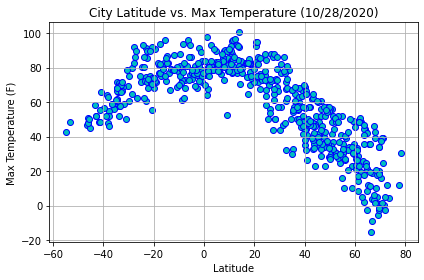

In [53]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude vs. Max Temperature ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_max_temp"
)


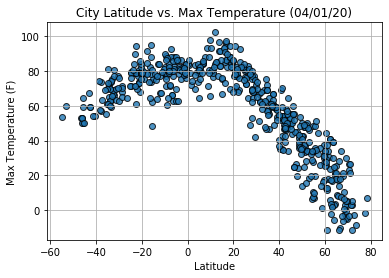

## Latitude vs. Humidity Plot

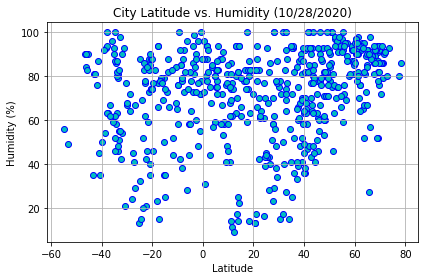

In [54]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude vs. Humidity ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_humidity"
)

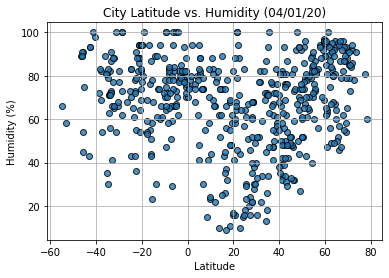

## Latitude vs. Cloudiness Plot

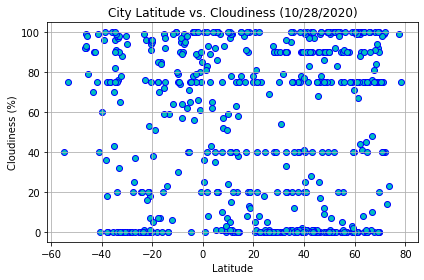

In [56]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude vs. Cloudiness ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_cloudiness"
)

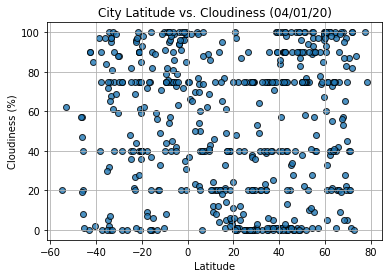

## Latitude vs. Wind Speed Plot

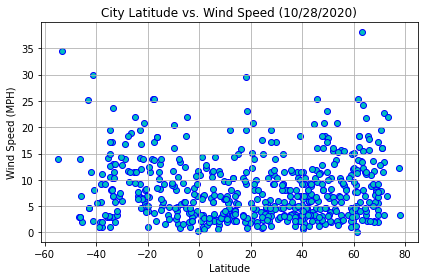

In [57]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude vs. Wind Speed ({analysis_date})",
    "o",
    "c",
    "b",
    "scatter_wind_speed"
)

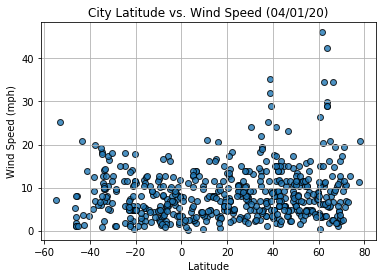

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [60]:
northern_hemisphere = clean_city_data[clean_city_data["Lat"] >= 0]

The r-value is: -0.8766253984767939


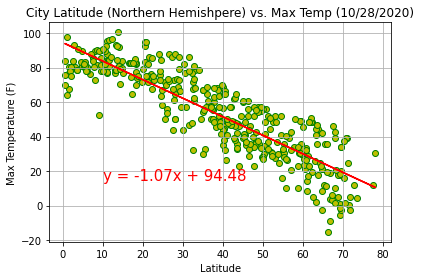

In [61]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Northern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_max_temp",
    True,
    (10,15)
)

The r-value is: 0.46937863826630627


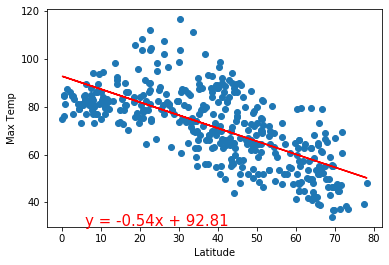

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [62]:
southern_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]

The r-value is: 0.6888690785628933


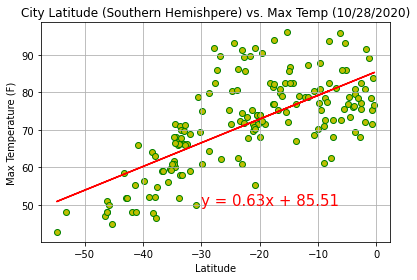

In [63]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Southern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_max_temp",
    True,
    (-30,50)
)

The r-value is: 0.6082708688906918


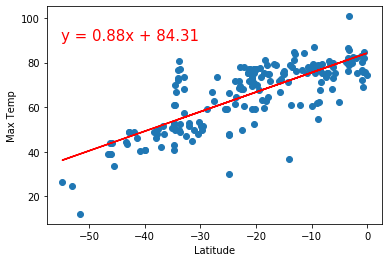

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3064869843576642


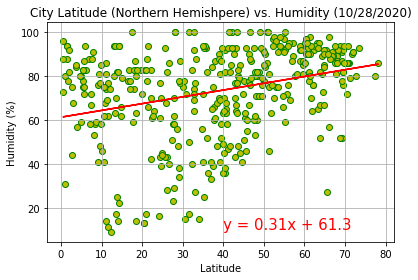

In [65]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Northern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_humidity",
    True,
    (40,10)
)

The r-value is: 0.000543987878808455


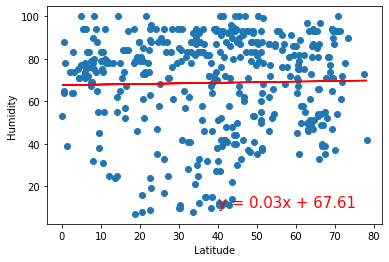

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06708631329370686


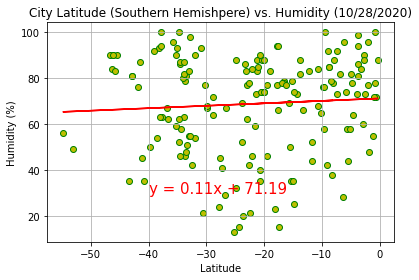

In [67]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Southern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_humidity",
    True,
    (-40,30)
)

The r-value is: 0.014985174297345524


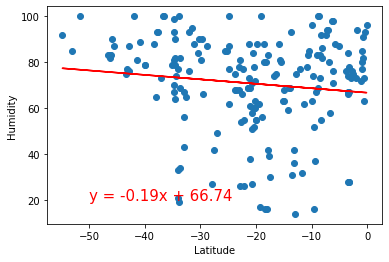

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13903568784723525


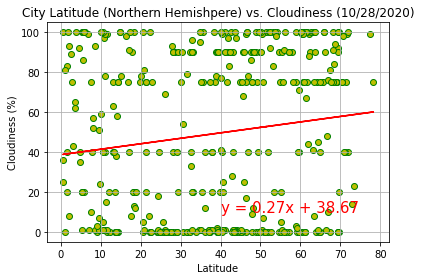

In [69]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Northern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_cloudiness",
    True,
    (40,10)
)

The r-value is: 0.0020898727664228514


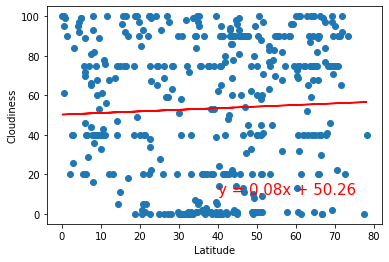

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11907522733801192


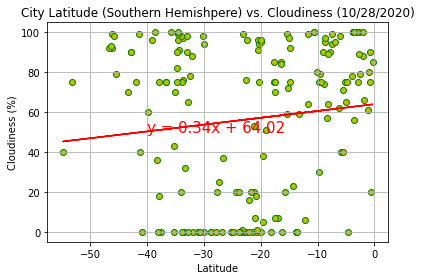

In [70]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Southern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_cloudiness",
    True,
    (-40,50)
)

The r-value is: 0.0035263772085582894


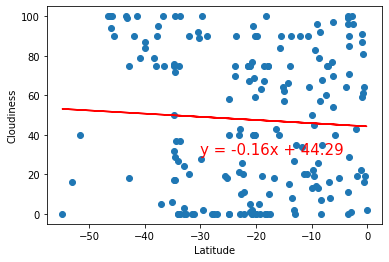

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21528740676001423


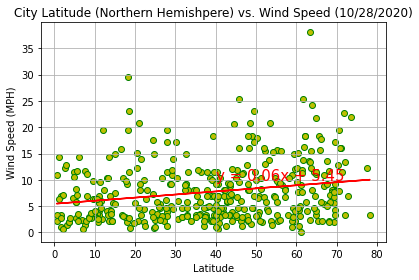

In [71]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Northern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_nh_wind_speed",
    True,
    (40,10)
)

The r-value is: 0.04019723576144484


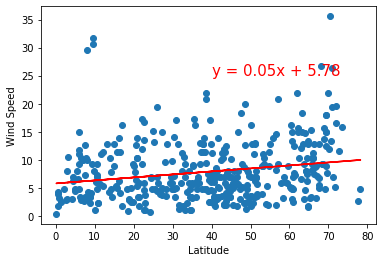

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1649169606527124


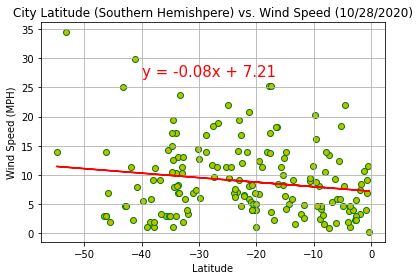

In [74]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Southern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    "scatter_sh_wind_speed",
    True,
    (-40,27)
)

The r-value is: 0.017128274759839232


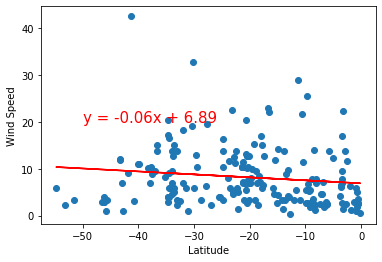